In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [16]:
img = image.load_img("C:\\Users\\SANKET\\Desktop\\computer vision\\Basedata\\train\\Covid\\1-s2.0-S0140673620303706-fx1_lrg.jpg")

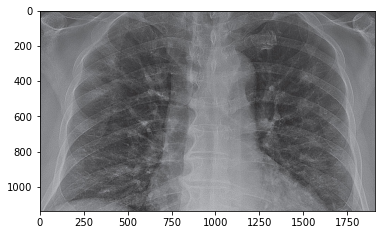

In [5]:
plt.imshow(img)

In [17]:
cv2.imread("C:\\Users\\SANKET\\Desktop\\computer vision\\Basedata\\train\\Covid\\1-s2.0-S0140673620303706-fx1_lrg.jpg")

array([[[ 92,  90,  90],
        [ 87,  85,  85],
        [ 90,  88,  88],
        ...,
        [ 90,  88,  88],
        [ 88,  86,  86],
        [ 85,  83,  83]],

       [[ 97,  95,  95],
        [ 95,  93,  93],
        [100,  98,  98],
        ...,
        [ 89,  87,  87],
        [ 85,  83,  83],
        [ 82,  80,  80]],

       [[ 97,  95,  95],
        [100,  98,  98],
        [107, 105, 105],
        ...,
        [ 87,  85,  85],
        [ 82,  80,  80],
        [ 79,  77,  77]],

       ...,

       [[154, 150, 149],
        [156, 152, 151],
        [156, 152, 151],
        ...,
        [151, 147, 146],
        [146, 142, 141],
        [147, 143, 142]],

       [[152, 148, 147],
        [156, 152, 151],
        [158, 154, 153],
        ...,
        [158, 154, 153],
        [158, 154, 153],
        [147, 143, 142]],

       [[152, 148, 147],
        [156, 152, 151],
        [158, 154, 153],
        ...,
        [155, 151, 150],
        [162, 158, 157],
        [151, 147, 146]]

In [101]:
train = ImageDataGenerator(rescale = 1/255)
Validation = ImageDataGenerator(rescale = 1/255)
testing = ImageDataGenerator(rescale = 1/255)

In [102]:
train_dataset = train.flow_from_directory("C:\\Users\\SANKET\\Desktop\\computer vision\\Basedata\\train",
                                        target_size = (200,200),
                                        batch_size = 3,
                                        class_mode = 'binary')
validation_dataset = train.flow_from_directory("C:\\Users\\SANKET\\Desktop\\computer vision\\Basedata\\validation",
                                        target_size = (200,200),
                                        batch_size = 3,
                                        class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [103]:
validation_dataset.class_indices

{'Covid': 0, 'No_findings': 1}

In [104]:
train_dataset.class_indices

{'Covid': 0, 'No_findings': 1}

In [121]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])
                                   

In [122]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [123]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 951ms/step - loss: 11.6200 - accuracy: 0.4444 - val_loss: 4.5354 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 484ms/step - loss: 2.2732 - accuracy: 0.5000 - val_loss: 0.8135 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 1s 460ms/step - loss: 0.8192 - accuracy: 0.3750 - val_loss: 0.7206 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 2s 528ms/step - loss: 0.7516 - accuracy: 0.3750 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 1s 421ms/step - loss: 0.6386 - accuracy: 0.5556 - val_loss: 1.2592 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 1s 418ms/step - loss: 1.4422 - accuracy: 0.7778 - val_loss: 0.7689 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 1s 412ms/step - loss: 1.4908 - accuracy: 0.4444 - val_loss: 0.6366 - val_accuracy: 0.8000
Epoch 8/30
3/3 [===

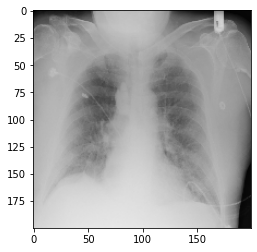

Normal


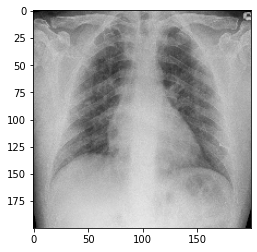

Covid


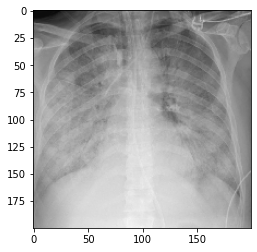

Covid


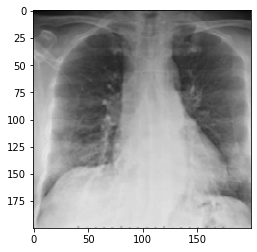

Covid


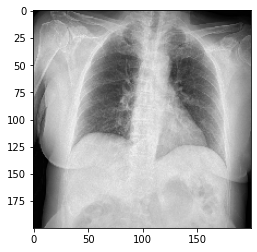

Covid


In [124]:
dir_path = "C:\\Users\\SANKET\Desktop\\computer vision\\Basedata\\testing"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size = (200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x  = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    model.predict(images)
    val = model.predict(images)
    
    if val == 0:
        print("Covid")
    else:
        print("Normal")